<center><b>Laboratorio 5 </center></b>
<br>
<center><b> Ejercicio 1 </center></b>
Para el ejercicio #1, se utilizará para las frases una representación
a través de un vector de unos y ceros, cada columna del vector representa una
palabra y el valor indica si esta aparece o no. <br> <br>
<center><b> Bernoulli NB </center></b>
Utilizando esta representación, me di cuenta que lo más adecuado es implementar un
Bernoulli Naive Bayes, pues cada uno de nuestros features es una variable binaria con su propia
distribución de Bernoulli (siendo p la probabilidad de que la palabra x aparezca en una frase de
nuestra muestra) <br> <br>
<center><b> Preparación del excel </center></b>
Para esta preparación, copio palabra por palabra en una columna de excel,
luego elimino duplicados y posteriormente ubico las filas como columnas (features). A cada columna
se le asigna un valor de 1 o 0 dependiendo de si esta palabra aparece en la frase o no.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

In [2]:
# read file
words_dataset = pd.read_csv('words.csv')
words_dataset.head(5)

,this,is,my,book,they,are,novels,have,you,read,...,characters,how,I,bought,like,fictions,your,favorite,I,question
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


Para este caso tendremos dos datasets que salen del mismo, el primer input lo limitamos a las
primeras 15 filas

In [3]:
words_short = words_dataset.head(15)
words_short.shape

(15, 24)

Procedemos a separar los datasets en train y test.

In [4]:
Y = words_dataset['question']
X = words_dataset.drop(columns=['question'])
Y_short = words_short['question']
X_short = words_short.drop(columns=['question'])

# split
X_train, X_test, Y_train, Y_test = tts(X, Y, test_size= 0.33, random_state=17)
X_train_s, X_test_s, Y_train_s, Y_test_s = tts(X_short, Y_short, test_size= 0.33, random_state=17)

Una vez tenemos nuestros conjuntos preparados, el siguiente paso es entrenar los modelos
y comparar resultados. <br>
Utilizamos los hiperparámetros: <br> <b>binarize = False</b> <br> ya que las variables ya son binarias.<br>
<b>fit_prior = True</b> <br> para que el modelo analice la distribución de probabilidad de las variables.

In [5]:
BernNB = BernoulliNB(binarize=False, fit_prior=True)
BernMB_short = BernoulliNB(binarize=False, fit_prior=True)

BernNB.fit(X_train, Y_train)
BernMB_short.fit(X_train_s, Y_train_s)

BernoulliNB(binarize=False)

El siguiente paso es predecir y evaluar la precisión del modelo.

In [6]:
Y_pred = BernNB.predict(X_test)
Y_pred_s = BernMB_short.predict(X_test_s)

print(accuracy_score(Y_test, Y_pred))
print(accuracy_score(Y_test_s, Y_pred_s))

0.8888888888888888
0.6


Como podemos observar, usando los mimos parametros, obtenemos un resultado mucho mejor utilizando el conjunto
de datos más grande, lo cual era de esperarse. En muestras pequeñas como estas, un aumento de 12 muestras
es un gran aumento en información proporcionalmente (80%).

<center><b> Ejercicio 2 </center></b>
Para el ejercicio #2, se compararan los resultados de 3 clasificadores utilizando el mismo dataset. <br> <br>
<center><b> Ingesta y preparación </center></b>
Como habíamos discutido en clase, lo primero que haremos será ignorar el atributo "fruit_subtype", pues este
atributo es suficiente para clasificar el tipo de fruta y no sería necesario implementar un modelo.

In [7]:
# read file
fruit_data = pd.read_excel('FruitsData.xlsx')
fruit_data.head(5)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [8]:
# drop features which wont be used in the model
fruit_df = fruit_data.copy().drop(columns= ['fruit_subtype', 'fruit_name'])
fruit_df.head(5)

,fruit_label,mass,width,height,color_score
0,1,192,8.4,7.3,0.55
1,1,180,8.0,6.8,0.59
2,1,176,7.4,7.2,0.60
3,2,86,6.2,4.7,0.80
4,2,84,6.0,4.6,0.79


<center><b> Analisis exploratorio </center></b>
Frequencia de aparición por fruta

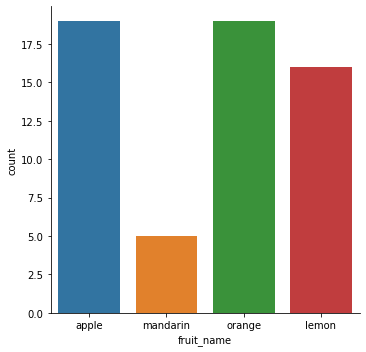

In [9]:
# fruit frequency
sns.catplot(x="fruit_name", kind="count", data=fruit_data)
plt.show()

<center><b> Box plots </center></b>

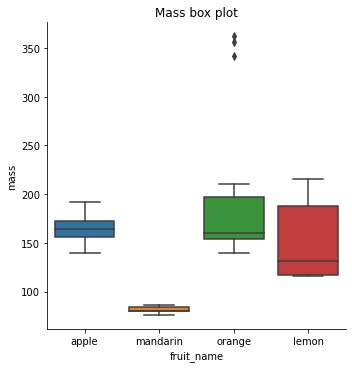

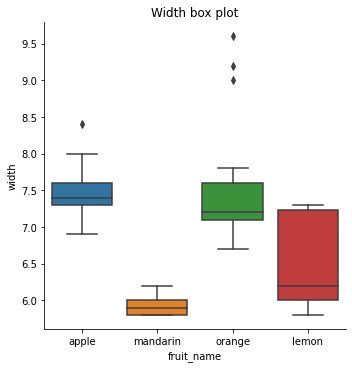

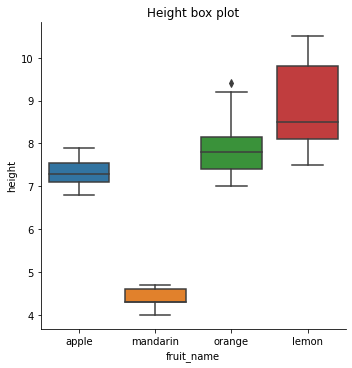

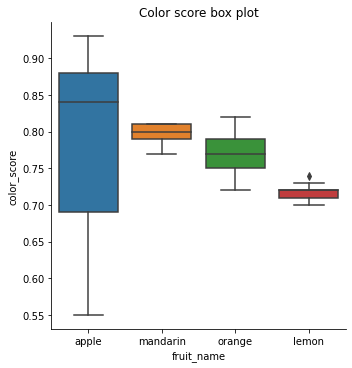

In [10]:
sns.catplot(x="fruit_name", y="mass", kind="box", data=fruit_data)
plt.title('Mass box plot')
plt.show()

sns.catplot(x="fruit_name", y="width", kind="box", data=fruit_data)
plt.title('Width box plot')
plt.show()

sns.catplot(x="fruit_name", y="height", kind="box", data=fruit_data)
plt.title('Height box plot')
plt.show()

sns.catplot(x="fruit_name", y="color_score", kind="box", data=fruit_data)
plt.title('Color score box plot')
plt.show()

A priori, parece ser muy fácil separar a una mandarina del resto de frutas, y utilizando la altura podríamos
separar a los limones de las otras dos. Las manzanas y naranjas comparten muchos atributos por lo que
va a ser dificil diferenciarlas. <br> <br>

<center><b> Histogramas </center></b>

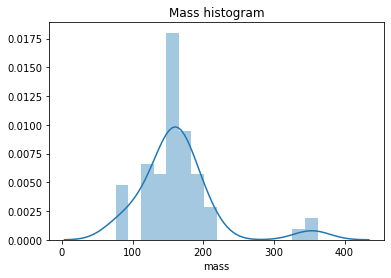

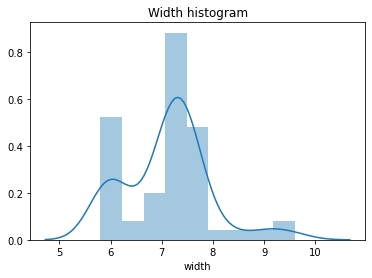

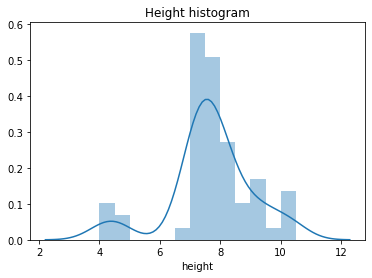

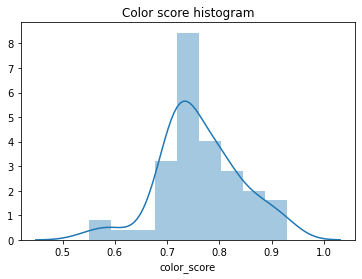

In [11]:
sns.distplot(fruit_df['mass'])
plt.title('Mass histogram')
plt.show()

sns.distplot(fruit_df['width'])
plt.title('Width histogram')
plt.show()

sns.distplot(fruit_df['height'])
plt.title('Height histogram')
plt.show()

sns.distplot(fruit_df['color_score'])
plt.title('Color score histogram')
plt.show()

De estos histogramas podemos asumir que las variables tienen una distribución que se asemeja a la normal.
Esto es útil al momento de escoger un clasificador. <br>
En este caso, para el representante de Naive Bayes, utilizaremos el GaussianNB.

<center><b> Matriz de correlación </center></b>

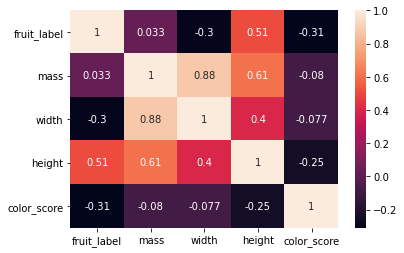

In [12]:
corrMatrix = fruit_df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Apoyandonos en este resultado y en los boxplots anteriormente mostrados. Podemos concluir que todos
los atributos salvo la masa son relevantes al momento de predecir que tipo de fruta es. La masa tiene una
correlación cercana al 0 pues distintos tipos de fruta tienen rangos de masa muy similares. <br>

<center><b> Entrenamiento de modelos </center></b>

In [13]:
Y = fruit_df['fruit_label']
X = fruit_df.drop(columns=['fruit_label'])

# split
X_train, X_test, Y_train, Y_test = tts(X, Y, test_size= 0.33, random_state=17)

# declare models
GNB = GaussianNB()
TreeModel = DecisionTreeClassifier()
KNN = KNeighborsClassifier()

In [14]:
# fit models
GNB.fit(X_train, Y_train)
TreeModel.fit(X_train, Y_train)
KNN.fit(X_train, Y_train)

KNeighborsClassifier()

<center><b> Comparación de métricas </center></b>

In [15]:
Y_pred_gnb = GNB.predict(X_test)
Y_pred_tm = TreeModel.predict(X_test)
Y_pred_knn = KNN.predict(X_test)

print('GNB score: ' + str(accuracy_score(Y_pred_gnb, Y_test)))
print('Tree score: ' + str(accuracy_score(Y_pred_tm, Y_test)))
print('KNN score: ' + str(accuracy_score(Y_pred_knn, Y_test)))

GNB score: 0.85
Tree score: 0.8
KNN score: 0.6


Como se puede apreciar, el modelo con mejores predicciones es el Gaussian Naive Bayes, teniendo muy cerca al
Desicion Tree. <br>
Sin ninguna sorpresa, el KNN está un poco lejos de los otros dos, una de las posibles razones es porque el KNN
es un modelo muy útil cuando no se tiene ninguna información previa de las variables y su relación con la
variable objetivo. Y en este caso tenemos mucha información relevante del conjunto de atributos.

<center><b> Visualización del árbol </center></b>

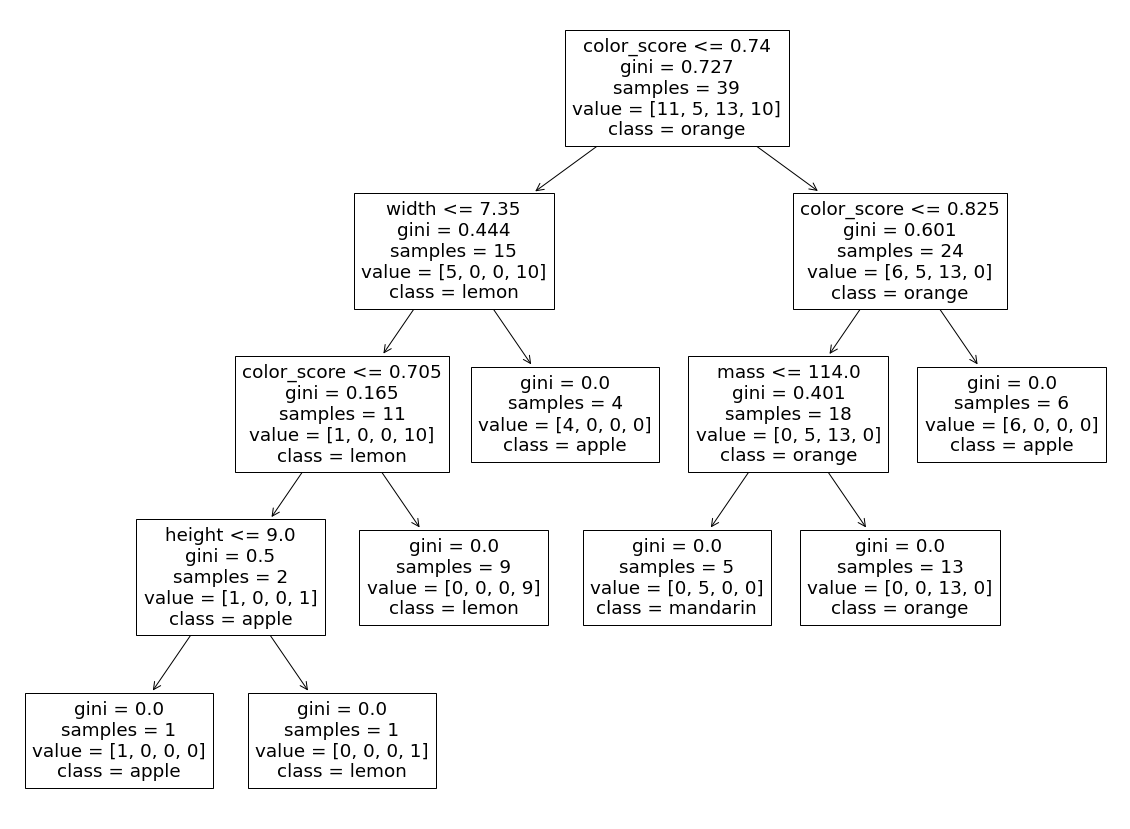

In [16]:
cn = ['apple', 'mandarin', 'orange', 'lemon']
plt.figure(figsize=[20, 15])
tree.plot_tree(TreeModel, feature_names=X.columns, class_names=cn)
plt.show()

<center><b> Ejercicio 3 </center></b>
Para el ejercicio #2, se compararan los resultados de 3 clasificadores utilizando el mismo dataset. <br> <br>

<center><b> Ingesta y preparación </center></b>

In [2]:
# read file
cancer_data = pd.read_excel('Breast_cancer.xlsx')
cancer_data.head(5)

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
# drop features which wont be used in the model
cancer_df = cancer_data.copy().drop(columns= ['ID'])
cancer_df.head(5)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


<center><b> Analisis exploratorio </center></b>

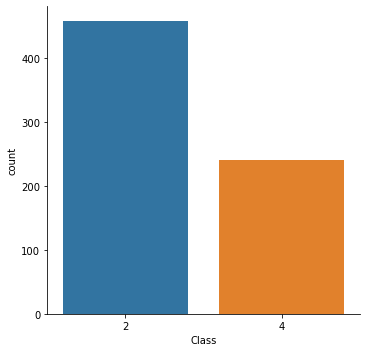

In [5]:
# class frequency
sns.catplot(x="Class", kind="count", data=cancer_df)
plt.show()

<center><b> Box plots </center></b>

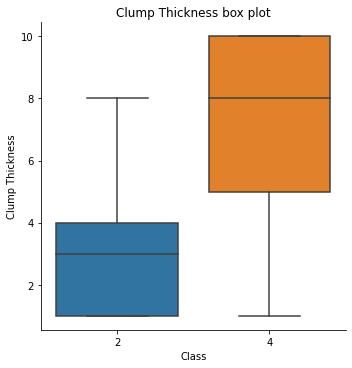

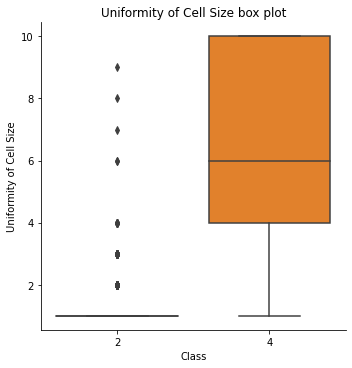

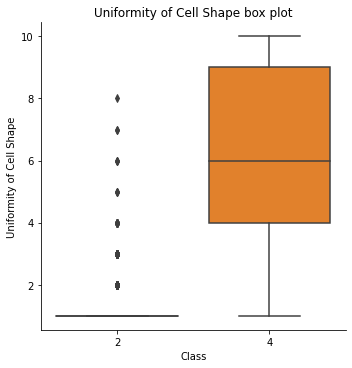

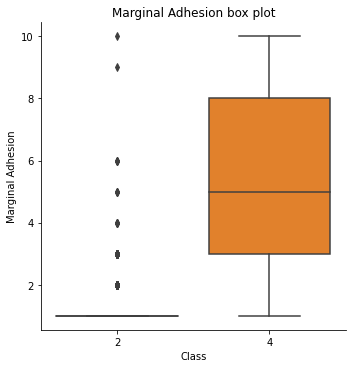

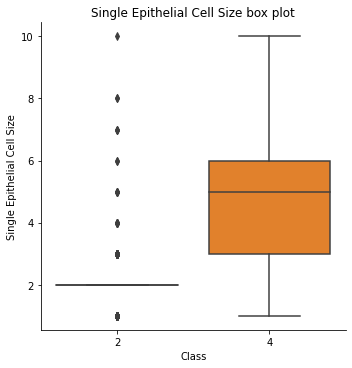

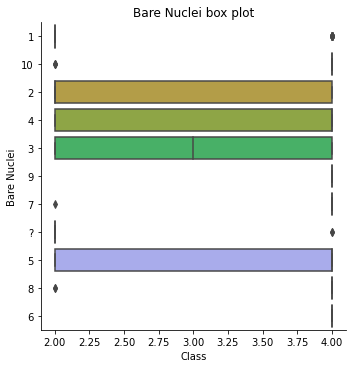

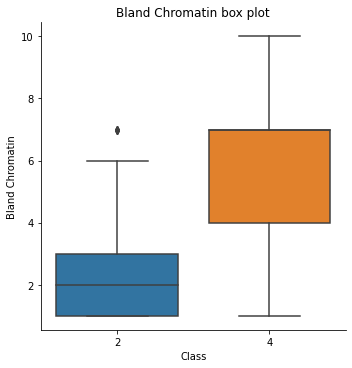

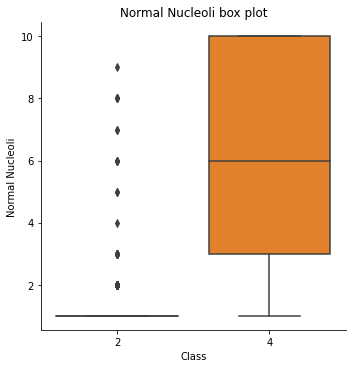

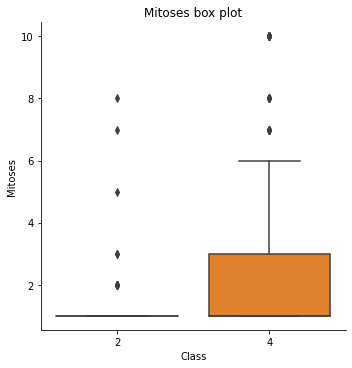

In [4]:
for (columnName) in cancer_df.columns:
    if(columnName != "Class"):
        sns.catplot(x="Class", y=columnName, kind="box", data=cancer_df)
        plt.title(columnName + ' box plot')
        plt.show()

Se puede apreciar que a través de los atributos es posible detectar qué tipo de clase estamos tratando.
Identificamos también que hay algunos valores que hacen falta para la variable "Bare Nuclei" <br> <br>
Una estrategia para solucionar valores que no aparecen es reemplazar los valores faltantes por un valor
que aparezca comunmente

Clump Thickness                8
Uniformity of Cell Size        4
Uniformity of Cell Shape       5
Marginal Adhesion              1
Single Epithelial Cell Size    2
Bare Nuclei                    1
Bland Chromatin                7
Normal Nucleoli                3
Mitoses                        1
Class                          4
Name: 23, dtype: int64


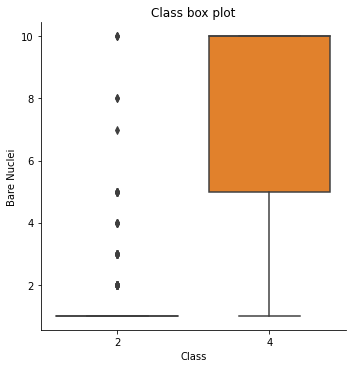

In [5]:
# clean data
cancer_df = cancer_df.replace('?', 1)

print(cancer_df.loc[23, :])

sns.catplot(x="Class", y="Bare Nuclei", kind="box", data=cancer_df)
plt.title(columnName + ' box plot')
plt.show()

<center><b> Histogramas </center></b>

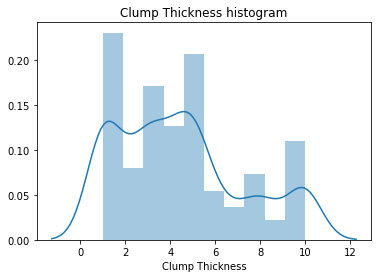

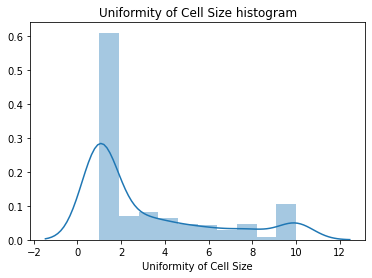

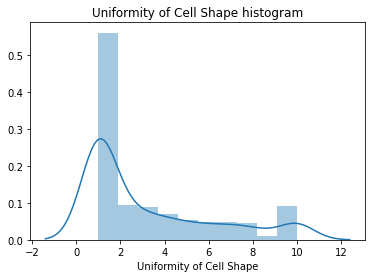

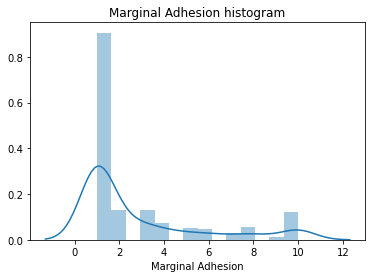

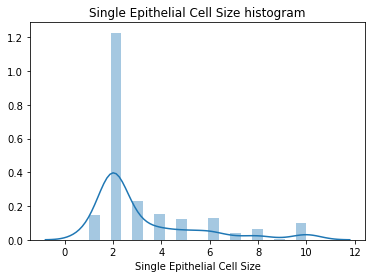

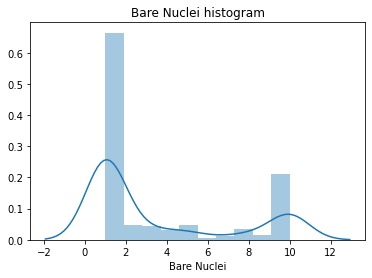

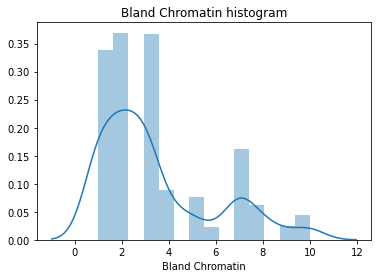

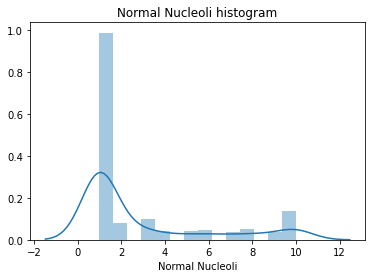

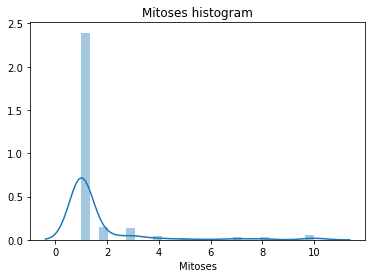

In [6]:
for (columnName) in cancer_df.columns:
    if(columnName != "Class"):
        sns.distplot(cancer_df[columnName])
        plt.title(columnName + ' histogram')
        plt.show()

De estos histogramas podemos asumir que las variables tienen una distribución multinomial.
Esto es útil al momento de escoger un clasificador. <br>
En este caso, para el representante de Naive Bayes, utilizaremos el MultinomialNB.

<center><b> Matriz de correlación </center></b>

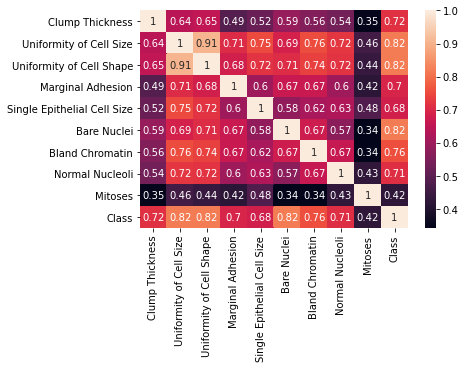

In [7]:
corrMatrix = cancer_df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Viendo la matriz de correlación se puede decir que todos los atributos tienen una correlacion alta con la variable
objetivo, salvo el atributo "Mitoses" que tiene una correlación media-baja. Vale la pena tener en cuenta todos los 
atributos al momento de entrenar el modelo.<br>

<center><b> Entrenamiento de modelos </center></b>

In [17]:
Y = cancer_df['Class']
X = cancer_df.drop(columns=['Class'])

# split
X_train, X_test, Y_train, Y_test = tts(X, Y, test_size= 0.33, random_state=17)

# declare models
MNB = MultinomialNB()
TreeModel = DecisionTreeClassifier(max_depth = 3)
KNN = KNeighborsClassifier()

In [18]:
# fit models
MNB.fit(X_train, Y_train)
TreeModel.fit(X_train, Y_train)
KNN.fit(X_train, Y_train)

KNeighborsClassifier()

<center><b> Comparación de métricas </center></b>

In [19]:
Y_pred_gnb = MNB.predict(X_test)
Y_pred_tm = TreeModel.predict(X_test)
Y_pred_knn = KNN.predict(X_test)

print('MNB score: ' + str(accuracy_score(Y_pred_gnb, Y_test)))
print('Tree score: ' + str(accuracy_score(Y_pred_tm, Y_test)))
print('KNN score: ' + str(accuracy_score(Y_pred_knn, Y_test)))

MNB score: 0.935064935064935
Tree score: 0.9523809523809523
KNN score: 0.9783549783549783


En este caso todos los modelos obtuvieron un desempeño sobresaliente, parece algo sospechoso que el KNN tenga un score
muy cercano al uno, lo cual puede ser muestra de overfitting. en un caso tan delicado como la detección de
cáncer, es importante apoyarse en otras métricas como la matriz de confusión (Pues un modelo como este no debe tener un gran margen de falsos negativos)

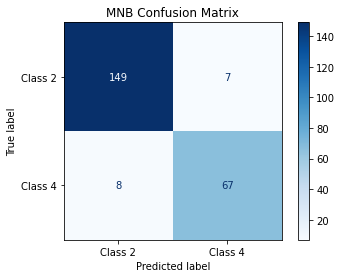

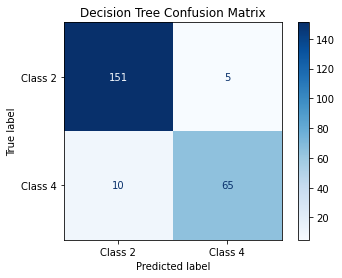

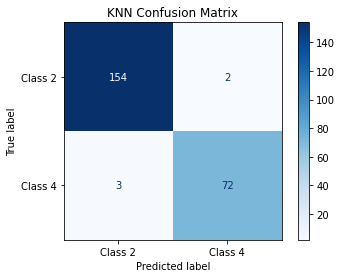

In [11]:
cn = ['Class 2', 'Class 4']

plot_confusion_matrix(MNB, X_test, Y_test, cmap=plt.cm.Blues, display_labels=cn)
plt.title('MNB Confusion Matrix')
plt.show()

plot_confusion_matrix(TreeModel, X_test, Y_test, cmap=plt.cm.Blues, display_labels=cn)
plt.title('Decision Tree Confusion Matrix')
plt.show()

plot_confusion_matrix(KNN, X_test, Y_test, cmap=plt.cm.Blues, display_labels=cn)
plt.title('KNN Confusion Matrix')
plt.show()

En este caso parece ser seguro el resultado del KNN, y en casos como este la precisión es clave, por lo que este es el mejor modelo de los 3.

<center><b> Visualización del árbol </center></b>

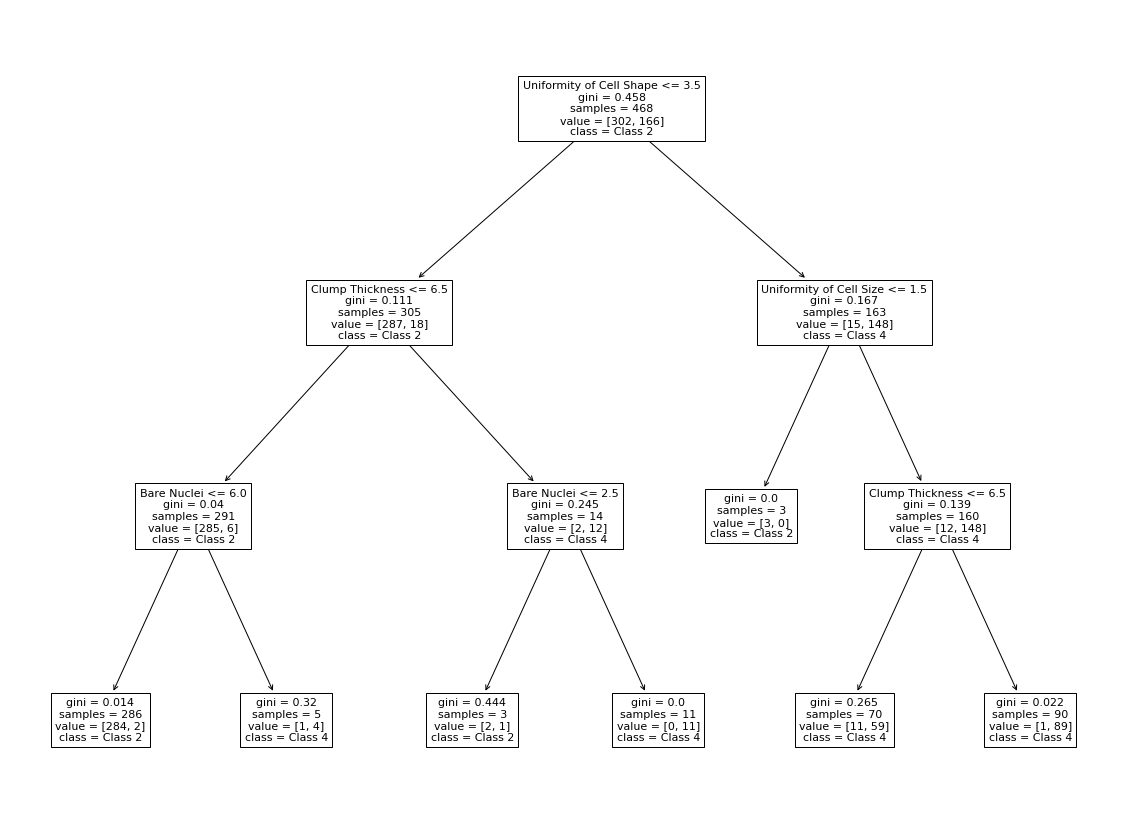

In [20]:
plt.figure(figsize=[20, 15])
tree.plot_tree(TreeModel, feature_names=X.columns, class_names=cn)
plt.show()